### Adv. Hydrology Project:
---

#### What are the impacts of using remotely sensed incoming radiation data (CERES) versus in situ measurements (CUES) on modeling temporal snow patterns?

SUMMA model sensitivity analysis comparing model runs using radiation forcing data from:
* [CUES snow study site data](https://snow.ucsb.edu/)
* [CERES remote sensing derived products](https://eosweb.larc.nasa.gov/project/ceres/syn1deg-day_ed4a)

Snow pattern evaluation variables:
* April 1st SWE
* Peak SWE accumulation
* Snow disappearance date
* Snow surface temperature
***

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
from datetime import datetime
import numpy as np

In [34]:
# load outputs from both model runs
cues = xr.open_dataset('output/output_cues.nc')
ceres = xr.open_dataset('output/output_cues-ceres.nc')

***
### SWE Timelines:

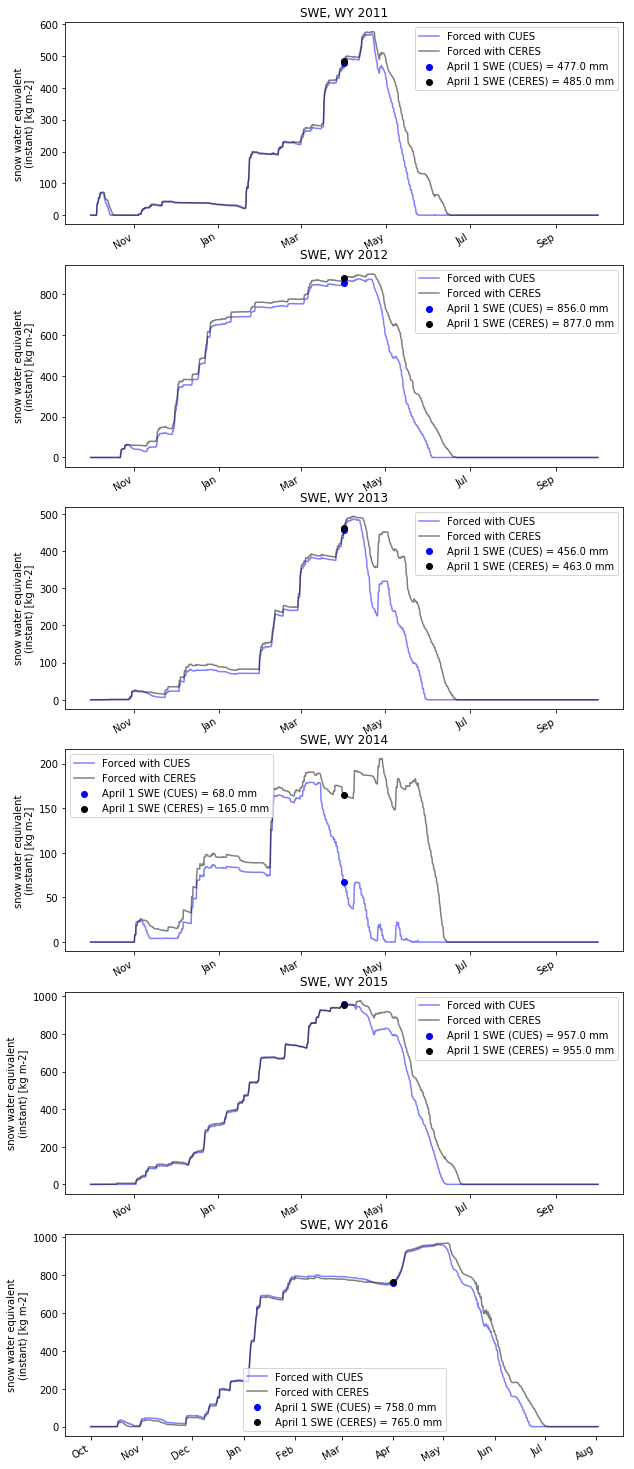

In [185]:
# Plot SWE timelines

# Define our water years
water_years = np.array(np.linspace(2011,2016,6),dtype='int32')

# initialize plots
fig, ax = plt.subplots(len(water_years),1,figsize=(10,26))

i=0 # for interating over subplots

for year in water_years: # plot each water year individually
    
    # Plot April 1st SWE from both model runs
    april1 = datetime.strptime('{}-04-01 00:00:00'.format(year+1),'%Y-%m-%d %H:%M:%S')
    ax[i].scatter(april1, cues.scalarSWE.loc[april1].values[0],
           color='b',label='April 1 SWE (CUES) = {} mm'.format((np.round(cues.scalarSWE.loc[april1].values[0],1))))
    ax[i].scatter(april1, ceres.scalarSWE.loc[april1].values[0],
           color='k',label='April 1 SWE (CERES) = {} mm'.format(np.round(ceres.scalarSWE.loc[april1].values[0],1)))
    
    # Plot SWE from both model runs
    cues.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='b',linestyle='-',alpha=0.5,label='SWE forced with CUES')
    ceres.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='k',linestyle='-',alpha=0.5,label='SWE forced with CERES')
    
    # Format the plot for this water year
    ax[i].set_title('SWE, WY {}'.format(year))
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    
    # iterate for subplots
    i+=1

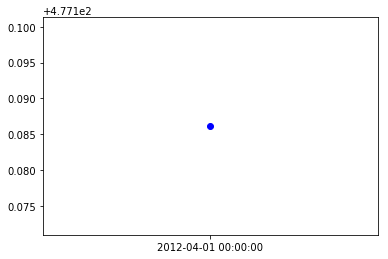

In [171]:
    # Plot April 1st SWE from both model runs

    #ceres.scalarSWE.loc['{}-4-01'.format(year+1)].resample(time='1D').mean().plot(ax=ax[i],color='k',label='April 1 SWE (CERES)')

***
### April 1st SWE:

In [5]:
# compare April 1st SWE

In [23]:
cues.time == '2010-04-01'

<xarray.DataArray 'time' (time: 59927)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 2010-10-01 ... 2017-08-01T21:59:59.999986688

***
### Peak SWE Accumulation date, amount:

In [38]:
# compare SWE accumulation


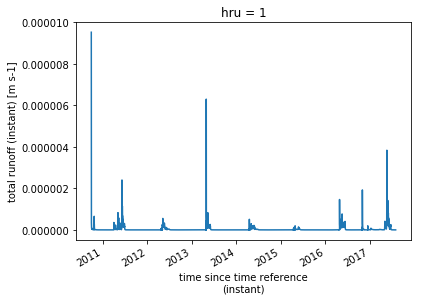

In [112]:
cues.scalarTotalRunoff.plot()

***
### SWE accumulation, depletion curves

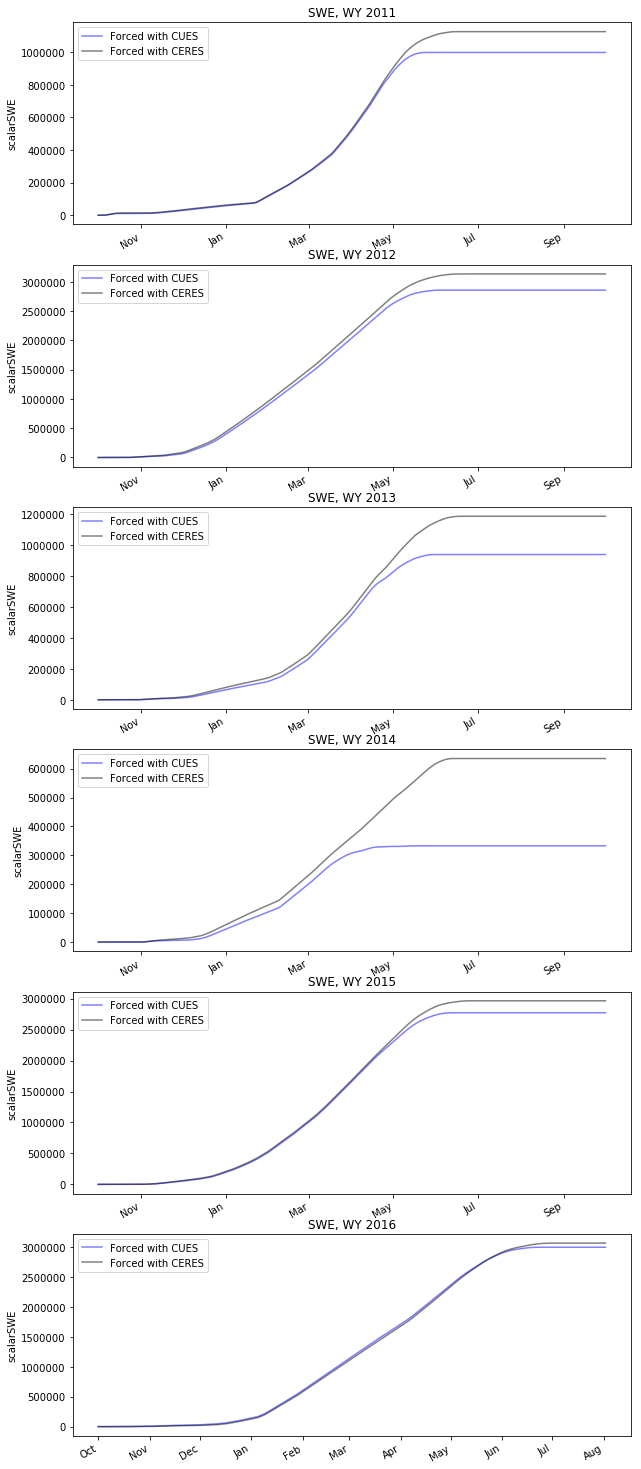

In [110]:
# compare SWE accumulation curves
water_years = np.array(np.linspace(2011,2016,6),dtype='int32')
fig, ax = plt.subplots(len(water_years),1,figsize=(10,26))
i=0
for year in water_years:
    cues_swe_accum = cues.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].cumsum()
    ceres_swe_accum = ceres.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].cumsum()
    cues_swe_accum.plot(ax=ax[i],color='b',linestyle='-',alpha=0.5,label='Forced with CUES')
    ceres_swe_accum.plot(ax=ax[i],color='k',linestyle='-',alpha=0.5,label='Forced with CERES')
    ax[i].set_title('SWE, WY {}'.format(year))
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    i+=1


In [7]:


# compare SWE depletion curves

In [ ]:
cues_swe_accum.plot(color='b',linestyle='-',alpha=0.5,label='Forced with CUES')
ceres_swe_accum.plot(color='k',linestyle='-',alpha=0.5,label='Forced with CERES')

***
### Snow disappearance date

In [8]:
# compare snow disappearance date

***
### Snow surface temperature

In [9]:
# compare snow surface temperature